In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations  import *
import datetime
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = r'C:\Users\Lolo\Documents\Master_EPFL\Ma3\ML\ML_course\projects\project1\data\train.csv\train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
import pandas as pd
cereal_df = pd.read_csv("C:/Users/Lolo/Documents/Master_EPFL/Ma3/ML/ML_course/projects/project1/data/train.csv/train.csv")
cereal_df2 = pd.read_csv("C:/Users/Lolo/Documents/Master_EPFL/Ma3/ML/ML_course/projects/project1/data/train.csv/train.csv")

In [4]:
cereal_df2.columns.values

array(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt'], dtype=object)

In [5]:
print(y.shape)

(250000,)


In [6]:
print(tX.shape)

(250000, 30)


### Exploratory data analysis

In [7]:
"""for i in range(0,tX.shape[1],7):
    plt.scatter(ids,tX[:,i])
    plt.title("Figure {} with NaN data".format(i))
    plt.show()"""

'for i in range(0,tX.shape[1],7):\n    plt.scatter(ids,tX[:,i])\n    plt.title("Figure {} with NaN data".format(i))\n    plt.show()'

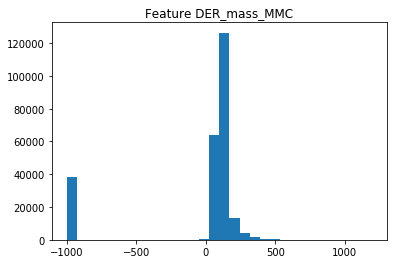

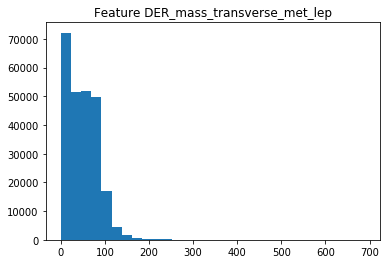

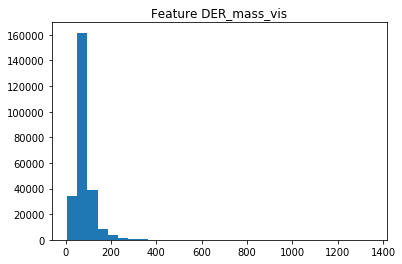

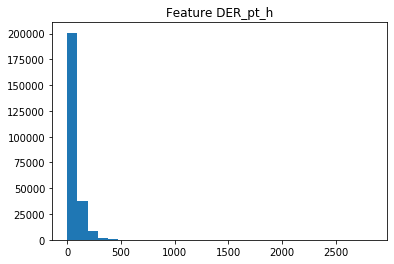

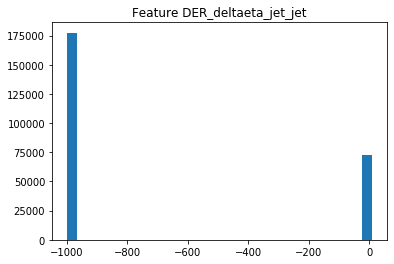

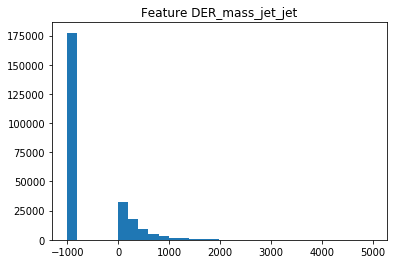

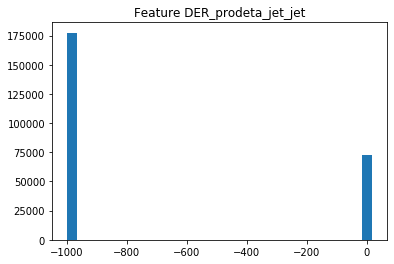

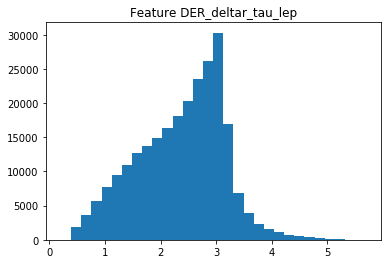

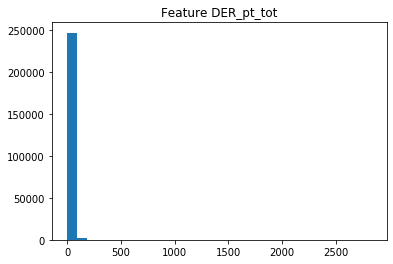

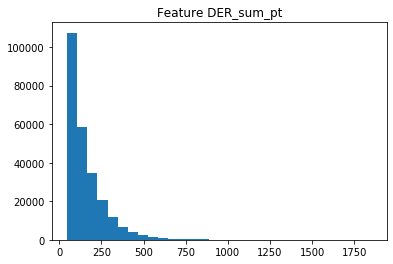

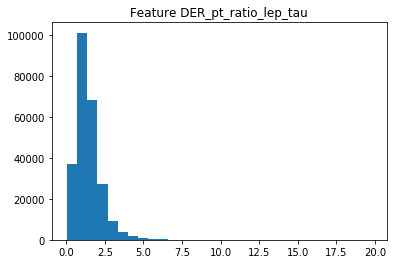

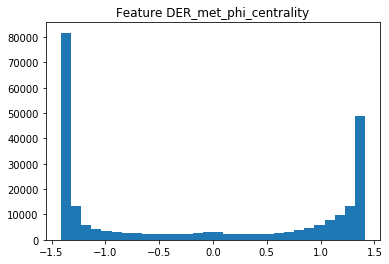

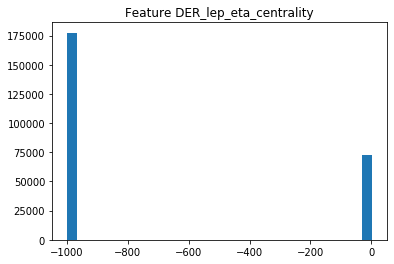

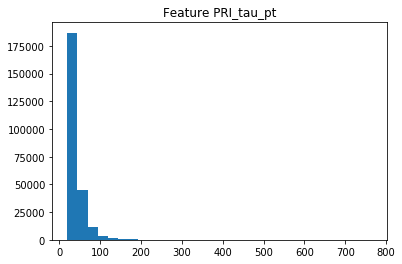

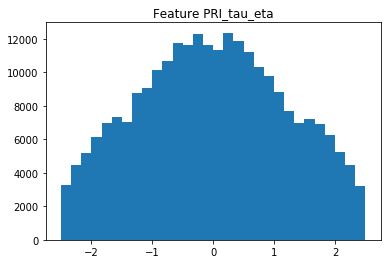

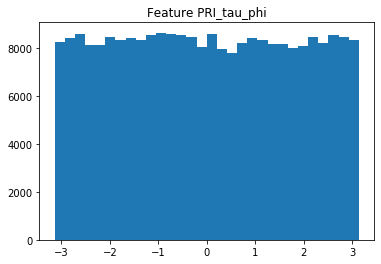

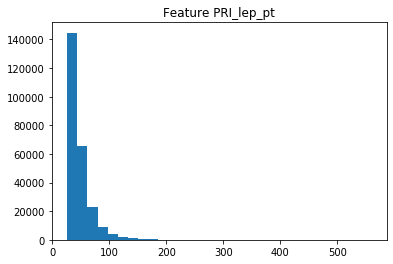

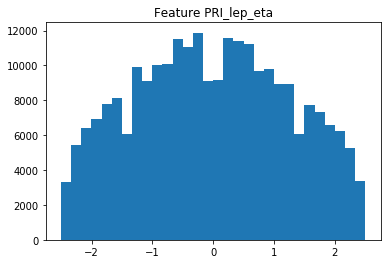

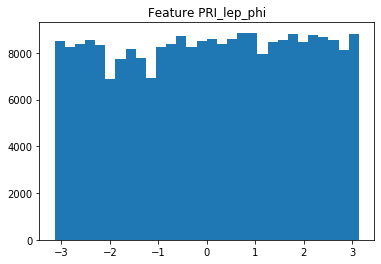

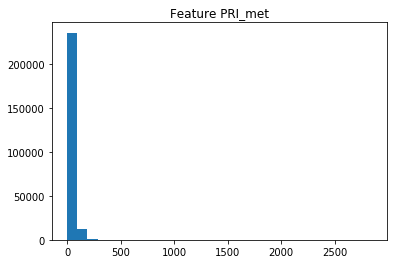

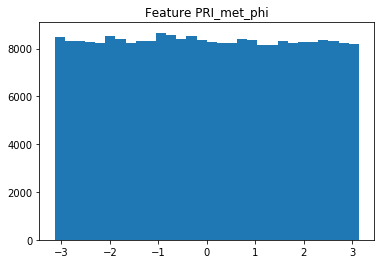

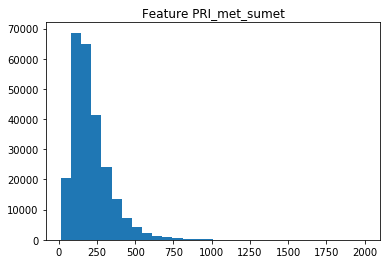

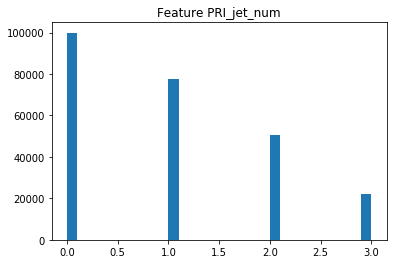

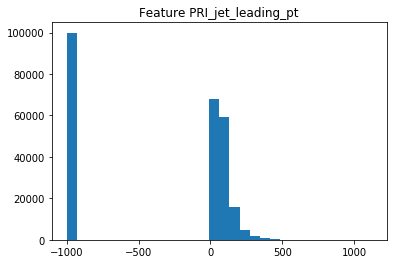

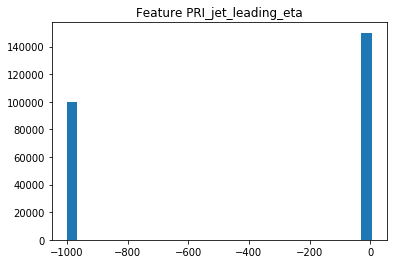

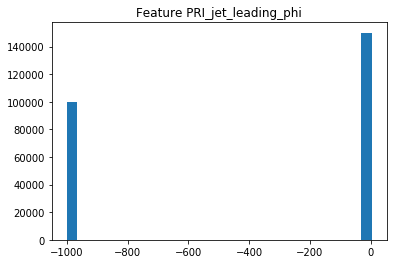

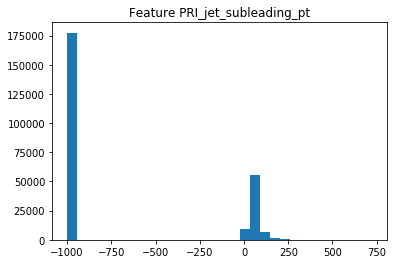

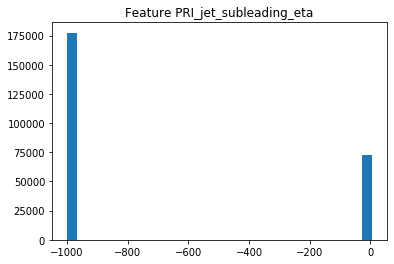

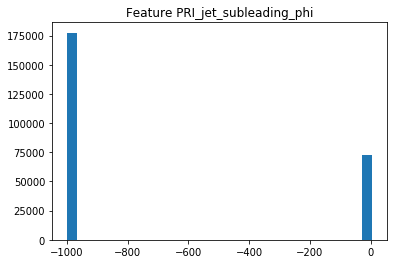

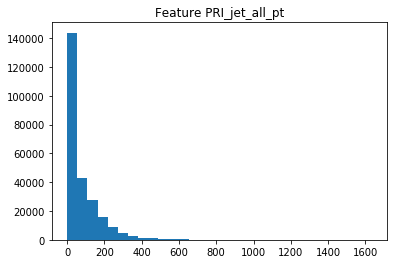

In [8]:
def plot_histograms(tX):
    for i in range(tX.shape[1]):
        plt.hist(tX[:,i], bins = 30)
        plt.title("Feature {}".format(cereal_df2.columns.values[i+2]))
        plt.show()
        
plot_histograms(tX)

In [9]:
def clean_data(tX):
    '''Set NaN values to the value of the mean for each feature'''
    
    tX[tX <= -999] = np.nan
    col_mean = np.nanmean(tX, axis=0)
    inds = np.where(np.isnan(tX))
    tX[inds] = np.take(col_mean, inds[1])
    
    return tX
tX = clean_data(tX)

0
0
0
0
0
0
0
0
0
Correlation scores for feature DER_deltar_tau_lep: 
DER_deltar_tau_lep PRI_met
[[1.         0.90448146]
 [0.90448146 1.        ]]


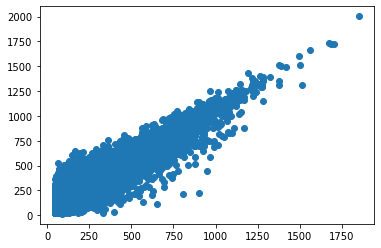

Correlation scores for feature DER_deltar_tau_lep: 
DER_deltar_tau_lep PRI_jet_subleading_eta
[[1.         0.96562839]
 [0.96562839 1.        ]]


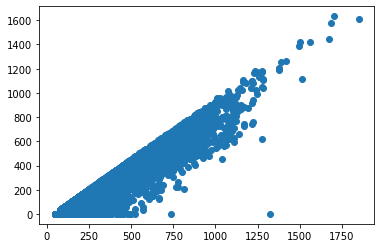

2
2
2
2
2
2
2
2
2
2
2
2
Correlation scores for feature PRI_met: 
PRI_met DER_deltar_tau_lep
[[1.         0.90448146]
 [0.90448146 1.        ]]


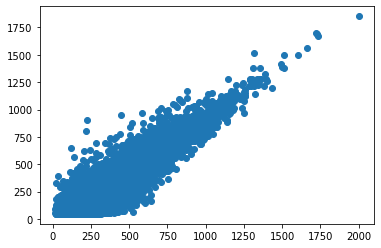

3
3
3
3
3
3
3
3
Correlation scores for feature PRI_jet_subleading_eta: 
PRI_jet_subleading_eta DER_deltar_tau_lep
[[1.         0.96562839]
 [0.96562839 1.        ]]


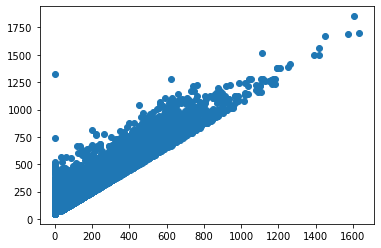

4


In [10]:
def check_correlation(tX):
    a = []
    temp = 0
    u = []
    for i in range(tX.shape[1]):
        for j in range(tX.shape[1]):
            if i != j:
                temp = np.corrcoef(tX[:,i],tX[:,j])
                a.append(temp)
                if abs(temp[0,1]) > 0.9:
                    print("Correlation scores for feature {}: ".format(cereal_df2.columns.values[i]))
                    print(cereal_df2.columns.values[i],cereal_df2.columns.values[j])
                    print(temp)
                    u.append(temp)
                    plt.scatter(tX[:,i],tX[:,j])
                    plt.show()
                    
        print(len(u))
        a = []
        
        
check_correlation(tX)

In [11]:
def standardize_data(tX):
    for i in range(tX.shape[1]): 
        tX[:,i] = tX[:,i] - np.mean(tX[:,i])
        tX[:,i] = tX[:,i] / np.std(tX[:,i])
    return tX

In [12]:
def remove_outliers(tX):
    for i in range(tX.shape[1]):
        mean = np.mean(tX[:,i])
        standard_deviation = np.std(tX[:,i])
        distance_from_mean = abs(tX[:,i] - mean)
        max_deviations = 3
        outliers = distance_from_mean >= max_deviations * standard_deviation
        tX[outliers] = mean
    return tX

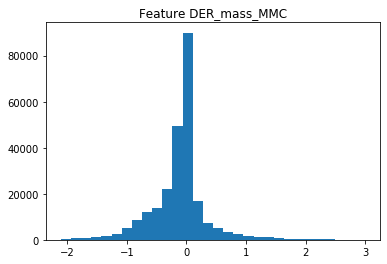

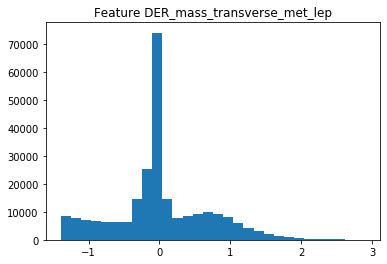

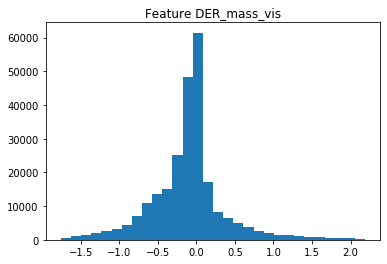

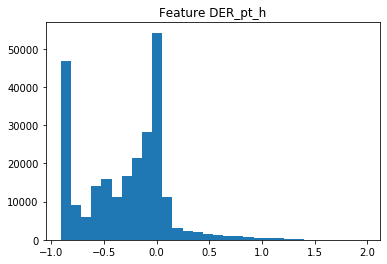

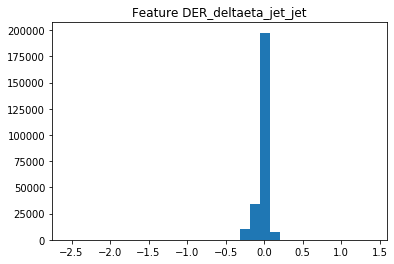

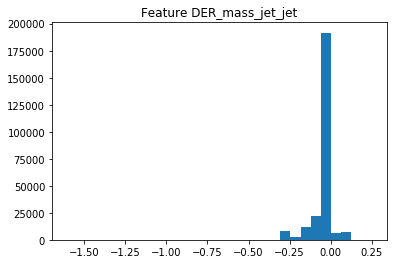

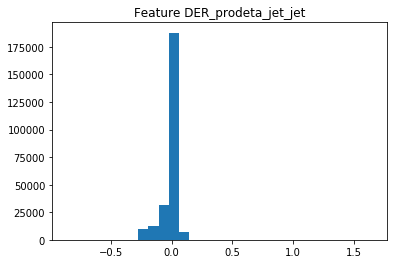

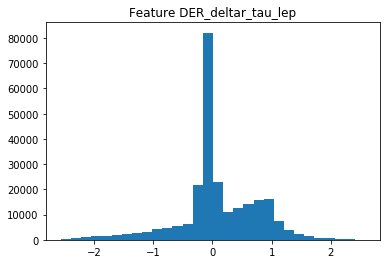

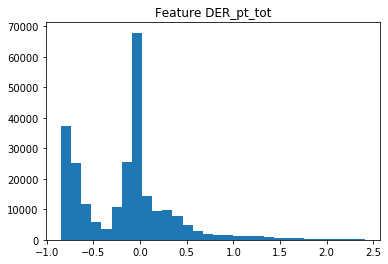

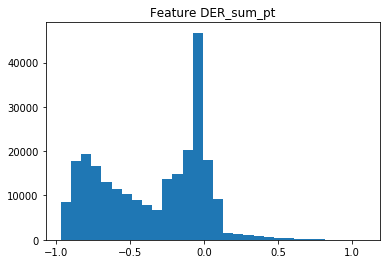

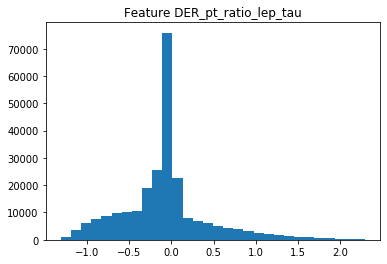

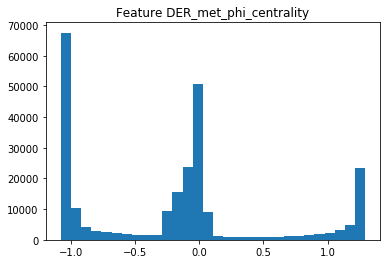

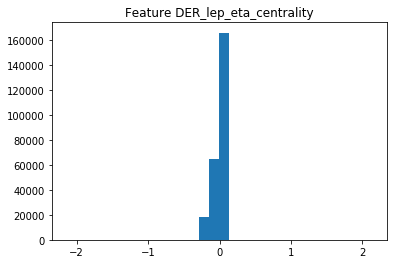

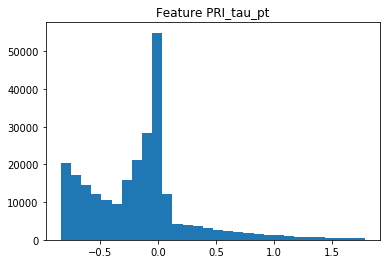

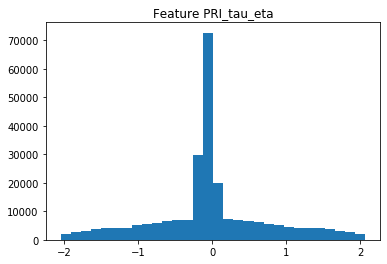

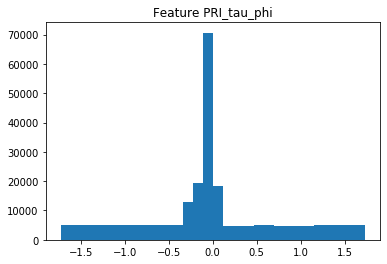

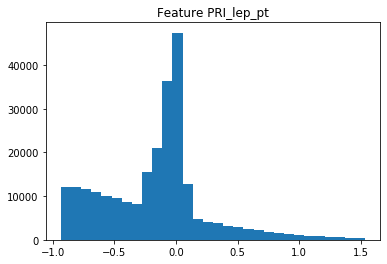

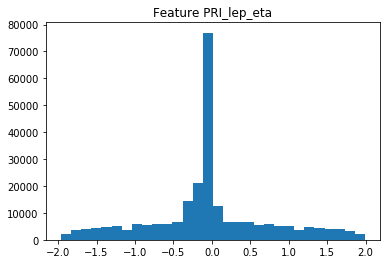

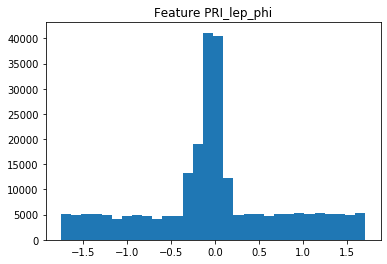

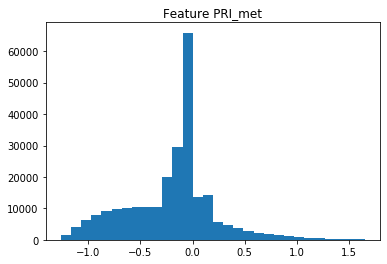

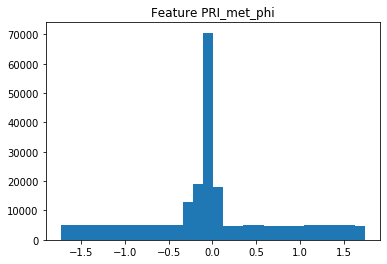

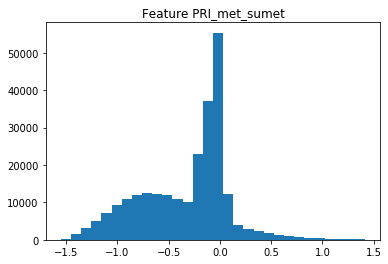

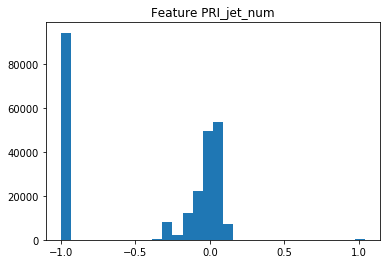

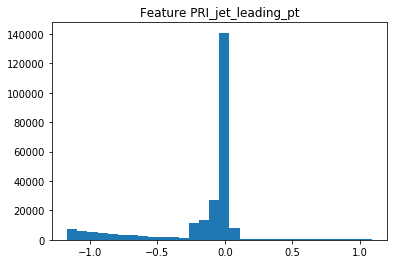

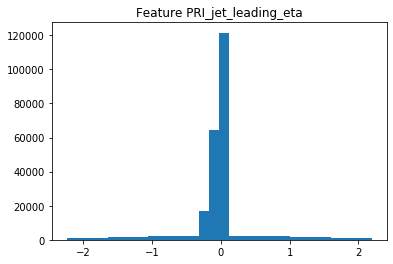

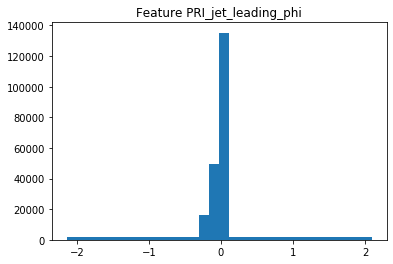

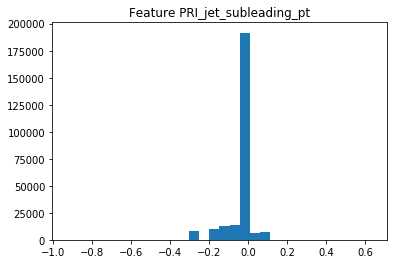

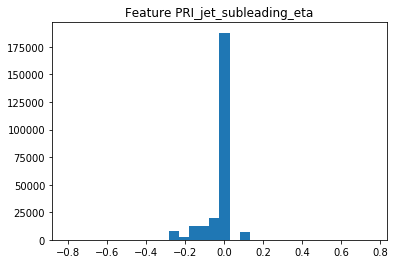

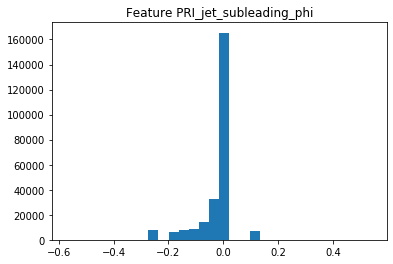

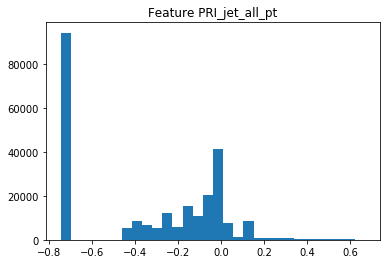

In [13]:
tX = clean_data(tX)
tX = standardize_data(tX)
tX_cleaned = remove_outliers(tX)
plot_histograms(tX)

### Implemented functions

In [14]:
def least_squares_GD(y, tX, initial_w, max_iters, gamma):
    """Calculate weights and loss using gradient descent with least squares"""
    
    loss, w = gradient_descent(y,tX,initial_w, max_iters, gamma)
    
    return w, loss



1.0


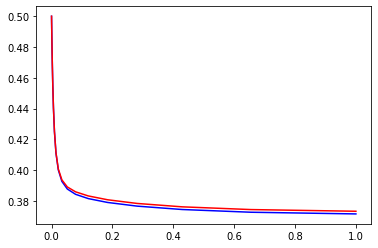

In [15]:
x_train, x_test, y_train, y_test = split_data(tX, y, 0.8, 1)

gammas = np.logspace(-9,0, 50)
ws = []
losses = []
results_tr = []
results_te = []

for gamma in gammas:
    w, loss = least_squares_GD(y_train, x_train, np.zeros(tX.shape[1]), 50, gamma)
    ws.append(w)
    losses.append(loss)
    results_tr.append(compute_loss(y_train, x_train, w))
    results_te.append(compute_loss(y_test, x_test, w))
ind_opt_gamma = np.argmin(results_te)
    
plt.plot(gammas, results_tr, 'b')
plt.plot(gammas, results_te, 'r')
print(gammas[ind_opt_gamma])

In [16]:
def least_squares_SGD(y, tx, initial_w,max_iters, gamma):
    """Calculate weights and loss using stochastic gradient descent with least squares"""
    
    batch_size = 1 # Default value
    
    #Calculate loss and weights using stochastic gradient descent. By default batch_size = 1
    loss, w = stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma)
    
    return w, loss

0.047148663634573894


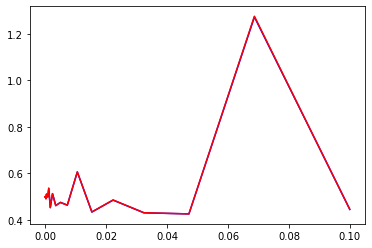

In [17]:
x_train, x_test, y_train, y_test = split_data(tX, y, 0.8, 1)

gammas = np.logspace(-9,-1, 50)
ws = []
losses = []
results_tr = []
results_te = []

for gamma in gammas:
    w, loss = least_squares_SGD(y_train, x_train, np.zeros(tX.shape[1]), 50, gamma)
    ws.append(w)
    losses.append(loss)
    results_tr.append(compute_loss(y_train, x_train, w))
    results_te.append(compute_loss(y_test, x_test, w))

ind_opt_gamma = np.argmin(results_te)
print(gammas[ind_opt_gamma])
plt.plot(gammas, results_tr, 'b')
plt.plot(gammas, results_te, 'r')

In [18]:
def least_squares(y, tx):
    """calculate the least squares solution using normal equations."""
    
    #w = (np.linalg.solve(tx.T @ tx, tx.T @ y))     # When using solve(), numerical inaccuracies are minimized
    w = np.linalg.inv(tx.T @ tx) @ tx.T @ y
    cte = (1/(2*len(y)))
    loss = compute_loss(y, tx, w) 
    
    return w, loss

In [19]:
x_train, x_test, y_train, y_test = split_data(tX, y, 0.9, 1)

w, loss = least_squares(y_train, x_train)

results_tr = compute_loss(y_train, x_train, w)
results_te = compute_loss(y_test, x_test, w)

print(results_tr)
print(results_te)

0.37030176384093144
0.37049297009690785


In [20]:
def ridge_regression(y, tx, lambda_):
    """calculate the ridge regression solution using normal equations."""
    
    diag = np.eye(tx.shape[1])
    cte = 2*tx.shape[0]
    A = tx.T @ tx + lambda_ * cte * diag
    b = tx.T @ y
    w = np.linalg.solve(A, b)
    loss = compute_loss(y, tx, w)
    
    return w, loss

0.3702804173814585
0.370546006654231
1.2689610031679182e-05


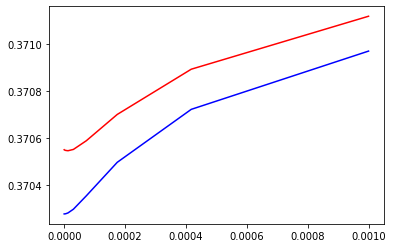

In [21]:
lambdas = np.logspace(-14, -3, 30)
ws = []
losses = []
results_tr = []
results_te = []

x_train, x_test, y_train, y_test = split_data(tX, y, 0.5, 1)

for lambda_ in lambdas:

    w, loss = ridge_regression(y_train, x_train, lambda_)
    ws.append(w)
    losses.append(loss)
    results_tr.append(compute_loss(y_train, x_train, w))
    results_te.append(compute_loss(y_test, x_test, w))

plt.plot(lambdas, results_tr, 'b')
plt.plot(lambdas, results_te, 'r')
ind_optimal_lambda = np.argmin(results_te)
best_lambda = lambdas[ind_optimal_lambda]
print(results_tr[ind_optimal_lambda])
print(results_te[ind_optimal_lambda])
print(best_lambda)

In [22]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """Calculate weights and loss using gradient descent with logistic regression"""
    
    w = initial_w 
    ws = [initial_w]
    losses = []
    for n_iters in range(max_iters):
        loss = calculate_loss(y, tx, w)
        grad = calculate_gradient(y, tx, w)
        w -= gamma*grad
        ws.append(w)
        losses.append(loss)
    w = ws[-1]
    loss = losses[-1]
    
    return w, loss

3.039195382313195e-05
0.4188762581203247


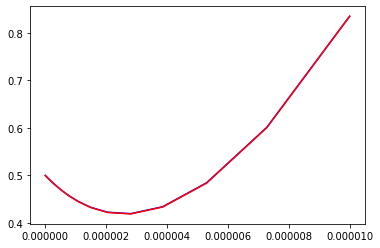

In [23]:
x_train, x_test, y_train, y_test = split_data(tX, y, 0.8, 1)

gammas = np.logspace(-9,-5, 30)
ws = []
losses = []
results_tr = []
results_te = []

for gamma in gammas:
    w, loss = logistic_regression(y_train, x_train, np.zeros(tX.shape[1]), 20, gamma)
    ws.append(w)
    losses.append(loss)
    results_tr.append(compute_loss(y_train, x_train, w))
    results_te.append(compute_loss(y_test, x_test, w))

plt.plot(gammas, results_tr, 'b')
plt.plot(gammas, results_te, 'r')
ind_optimal_lambda = np.argmin(results_te)
best_lambda = lambdas[ind_optimal_lambda]
print(best_lambda)
print(results_te[ind_optimal_lambda])

In [24]:
def reg_logistic_regression(y, tx, lambda_ , initial_w, max_iters, gamma):
    """Calculate weights and loss using gradient descent with logistic regression and L2-regularization"""
    
    w = initial_w 
    ws = [initial_w]
    losses = []
    for n_iters in range(max_iters):
        loss, grad = penalized_logistic_regression(y, tx, w, lambda_)   # Don't forget hess if needed
        w -= gamma*grad
        ws.append(w)
        losses.append(loss)
    
    # We return only the last w and loss values
    w = ws[-1]
    loss = losses[-1]
    
    return w, loss



# With gammas : -7,-3, 25 and lambdas : -5, -3, 25 => optimal gamma = 2.37*10^(-6), optimal lambda = 0.0001

In [25]:
x_train, x_test, y_train, y_test = split_data(tX, y, 0.8, 1)

gammas = np.logspace(-9,-5, 30)
lambdas = np.logspace(-11,-9, 30)

opt_lambdas = []
opt_mses = []

for gamma in gammas:
    ws = []
    losses = []
    results_tr = []
    results_te = []

    for lambda_ in lambdas:
        w, loss = reg_logistic_regression(y_train, x_train, lambda_, np.zeros(tX.shape[1]), 20, gamma)
        ws.append(w)
        losses.append(loss)
        results_tr.append(compute_loss(y_train, x_train, w))
        results_te.append(compute_loss(y_test, x_test, w))
    ind_optimal_lambda = np.argmin(results_te)
    opt_lambdas.append(lambdas[ind_optimal_lambda])
    opt_mses.append(results_te[ind_optimal_lambda])
    
ind_opt =  np.argmin(opt_mses)
print('optimal gamma: ', gammas[ind_opt],'|', 'optimal lambda: ', opt_lambdas[ind_opt])

optimal gamma:  2.8072162039411756e-06 | optimal lambda:  1e-09


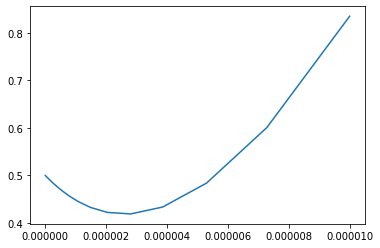

In [26]:
plt.plot(gammas, opt_mses)

In [27]:
print(opt_mses[ind_opt])

0.41887625812032436


In [28]:
2/0 #to stop the code ^^

ZeroDivisionError: division by zero

# Test of all the models (Work in progress...)

### Cross-validation (best hyperparameter selection)

#### a) For hyperparameter lambda 

In [ ]:
def cross_validation_lambda(y, x, k_indices, k, lambda_, degree=1):
    """Cross validation for each models"""

    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    x_train = x[np.concatenate(([x_train for i,x_train in enumerate(k_indices) if i!=k]), axis=0)]
    y_train = y[np.concatenate(([y_train for i,y_train in enumerate(k_indices) if i!=k]), axis=0)]

    # To uncomment and add if we test polynomial regression
    #phi_tr = build_poly(x_train, degree)
    #phi_te = build_poly(x_test, degree)

    # Calculate loss and optimal weights for each model
    
    w, loss = ridge_regression(y_train, x_train, lambda_)
 
    #loss_tr = compute_loss(y_train,x_train,w)
    #loss_te = compute_loss(y_test,x_test,w)
    
    # To uncomment if we decide to plot rmse
    loss_tr = np.sqrt(2*compute_loss(y_train,x_train,w))
    loss_te = np.sqrt(2*compute_loss(y_test,x_test,w))

    return loss_tr, loss_te, w

In [ ]:
seed = 1
degree = 1 # degree parameter not used until polynomial regression is tested
k_fold = 4
lambdas = np.logspace(-4, 0, 30) 

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
mse_tr = []
mse_te = []

for ind, lambda_ in enumerate(lambdas):
    temp_tr = []
    temp_te = []
    for k in range(k_fold):
        loss_tr, loss_te,_ = cross_validation_lambda(y, tX, k_indices, k, lambda_, degree)
        temp_tr.append(loss_tr)
        temp_te.append(loss_te)
    mse_tr.append(temp_tr)
    mse_te.append(temp_te)
plt.boxplot(mse_te)

In [ ]:
seed = 1
degree = 1 # degree parameter not used until polynomial regression is tested
k_fold = 4
lambdas = np.logspace(-4, 0, 30)
initial_w = np.zeros(tX.shape[1])

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
mse_tr = []
mse_te = []

for ind, lambda_ in enumerate(lambdas):
    temp_tr = 0
    temp_te = 0
    for k in range(k_fold):
        loss_tr, loss_te,_ = cross_validation_lambda(y, tX, k_indices, k, lambda_, degree)
        temp_tr = loss_tr
        temp_te = loss_te
    mse_tr.append(temp_tr/k_fold)
    mse_te.append(temp_te/k_fold)    
min_lambda = np.argmin(mse_te)
print('optimal lambda: ', lambdas[min_lambda])

#### b) For hyperparameter gamma

In [ ]:
def cross_validation_gamma(y, x, initial_w, k_indices, k, gamma, choose_model, models, degree=1):
    """Cross validation for each models"""

    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    x_train = x[np.concatenate(([x_train for i,x_train in enumerate(k_indices) if i!=k]), axis=0)]
    y_train = y[np.concatenate(([y_train for i,y_train in enumerate(k_indices) if i!=k]), axis=0)]

    # To uncomment and add if we test polynomial regression
    #phi_tr = build_poly(x_train, degree)
    #phi_te = build_poly(x_test, degree)

    # Calculate loss and optimal weights for each model
    
    if choose_model == models[0]:
        w, loss = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma)
    elif choose_model == models[1]:
        w, loss = least_squares_SGD(y_train, x_train, initial_w, max_iters, gamma)
    elif choose_model == models[2]:
        w, loss = least_squares(y_train, x_train) 
    else:
        w, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma)

    #loss_tr = compute_loss(y_train,x_train,w)
    #loss_te = compute_loss(y_test,x_test,w)
    
    #Note: We can also use mae to obtain the loss
    
    # To uncomment if we decide to plot rmse
    loss_tr = np.sqrt(2*compute_loss(y_train,x_train,w))
    loss_te = np.sqrt(2*compute_loss(y_test,x_test,w))

    return loss_tr, loss_te, w

In [ ]:
seed = 1
degree = 1 # degree parameter not used until polynomial regression is tested
k_fold = 4
gammas = np.linspace(0, 1, 10)
max_iters = 10
initial_w = np.zeros(tX.shape[1])

# Define the model (change indice to define which model to test)
models = ["GD", "SGD", "LS", "LRGD"]   
choose_model = models[1]

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
mse_tr = []
mse_te = []

for ind, gamma in enumerate(gammas):
    temp_tr = []
    temp_te = []
    for k in range(k_fold):
        loss_tr, loss_te,_ = cross_validation_gamma(y, tX, initial_w, k_indices, k, gamma, choose_model, models, degree)
        temp_tr.append(loss_tr)
        temp_te.append(loss_te)
    mse_tr.append(temp_tr)
    mse_te.append(temp_te)
plt.boxplot(mse_te)

In [ ]:
seed = 1
degree = 1 # degree parameter not used until polynomial regression is tested
k_fold = 4
gammas = np.linspace(0.00001, 1, 10)
max_iters = 50
initial_w = np.zeros(tX.shape[1])

# Define the model (change indice to define which model to test)
models = ["GD", "SGD", "LS", "LRGD"]   
choose_model = models[3]

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
mse_tr = []
mse_te = []

for ind, gamma in enumerate(gammas):
    temp_tr = 0
    temp_te = 0
    for k in range(k_fold):
        loss_tr, loss_te,_ = cross_validation_gamma(y, tX, initial_w, k_indices, k, gamma, choose_model, models, degree)
        temp_tr += loss_tr
        temp_te += loss_te
    mse_tr.append(temp_tr/k_fold)
    mse_te.append(temp_te/k_fold)
min_gamma = np.argmin(mse_te)
print('optimal gamma: ', gammas[min_gamma])

#### c) For both lambda and gamma 

In [ ]:
def cross_validation_l_g(y, x, initial_w, k_indices, k, lambda_, gamma, degree=1):
    """Cross validation for each models"""

    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    x_train = x[np.concatenate(([x_train for i,x_train in enumerate(k_indices) if i!=k]), axis=0)]
    y_train = y[np.concatenate(([y_train for i,y_train in enumerate(k_indices) if i!=k]), axis=0)]

    # To uncomment and add if we test polynomial regression
    #phi_tr = build_poly(x_train, degree)
    #phi_te = build_poly(x_test, degree)

    # Calculate loss and optimal weights for last model
    
    w, loss = reg_logistic_regression(y_train, x_train, lambda_ , initial_w, max_iters, gamma)
        
    loss_tr = compute_loss(y_train,x_train,w)
    loss_te = compute_loss(y_test,x_test,w)
    
    # To uncomment if we decide to plot rmse
    #loss_tr = np.sqrt(2*compute_loss(y_train,phi_tr,w))
    #loss_te = np.sqrt(2*compute_loss(y_test,phi_te,w))

    return loss_tr, loss_te, w

In [ ]:
# Define cross-validation for last model

### Bias-variance decomposition (TBD)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'ML_course\projects\project1\data\train.csv\train.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)